In [1]:
import numpy as np
import pandas as pd
import json
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx

In [2]:
def load_curve(filename):
    return np.load('pointClouds/'  + filename + '.npy')

In [6]:
 def load_PH(filename, length):
    with open('length_{}/PH/{}.json'.format(length,filename), 'r') as f:
        dic = json.load(f)
    data = [[a,b,c] for a,b,c in zip(dic["barcode"][0],dic["barcode"][1],dic["representatives"])]    
    data = sorted(data, key=lambda data_entry: data_entry[1]-data_entry[0])
     

    return data   

In [7]:
HGs = {}
for length in [100,200,300,400]:
    print(length)
    HGs[length] = []
    for i in range(200):
        PH = load_PH('{}'.format(i,200), length)
        HG = {}
    
        for ii in range(0,len(PH)):
            rep = np.unique(np.concatenate([el for el in PH[ii][2]]))
            rep = rep -1
            HG['cycle {}'.format(len(PH) -ii)] = rep
        H = hnx.Hypergraph(HG)
        HGs[length].append(H)



100
200
300
400


In [14]:
Df = []
Df_av = []
for length in [100,200,300,400]:
    ds = []
    es = []
    for i in range(200):
        H = HGs[length][i]
        dis = hnx.degree_dist(H)   
        df = pd.DataFrame()
        df['Degree distribution'] = dis
        df['Curve'] = i
        df['Length'] = length
        Df.append(df)

        ds.append( np.average(dis))
        es.append(H.number_of_edges())
    df_av = pd.DataFrame()
    df_av['Average degree'] = ds
    df_av['Number of edges'] = es
    df_av["Length"] = length
    Df_av.append(df_av)


        
        
        
        

DIST = pd.concat(Df)
DIST_av = pd.concat(Df_av)

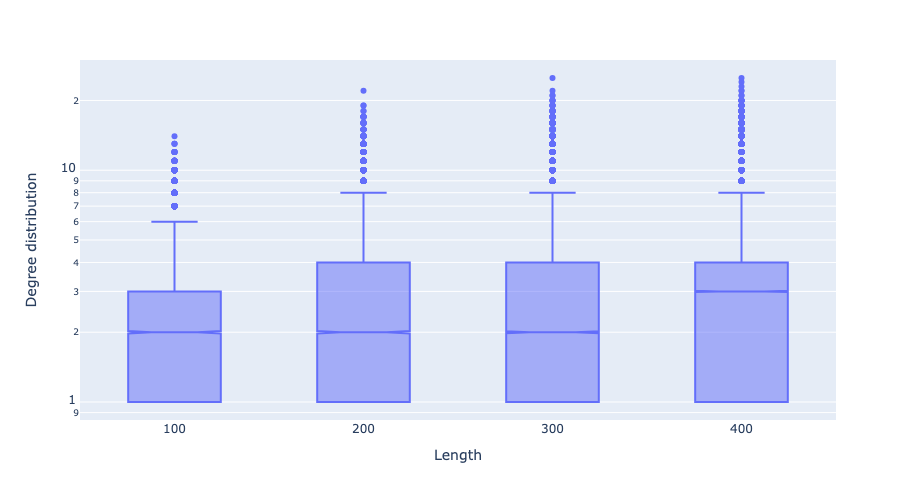

In [15]:
px.box(DIST, y = 'Degree distribution', x = 'Length',
       notched = True, width=500, height=500,
      log_y=True)

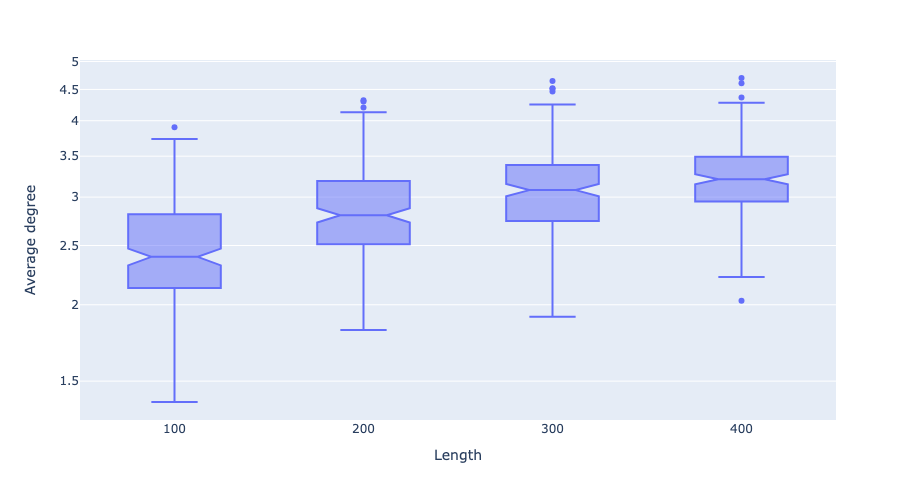

In [17]:
px.box(DIST_av, y = 'Average degree', x = 'Length',
       notched = True, width=500, height=500,
      log_y=True)


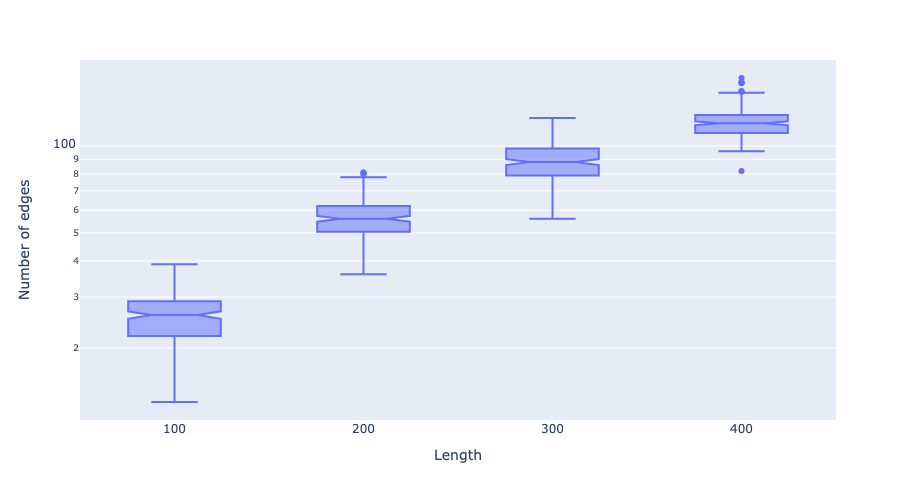

In [18]:
px.box(DIST_av, y = 'Number of edges', x = 'Length',
       notched = True, width=500, height=500,
      log_y=True)
